# Final notebook showing the outlier removal process!

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("Mega_merged_all_real_values.csv")

# Ensure Revenue is positive (to avoid division issues)
df = df[df["Revenue_USD"] > 0]

# Create new column for normalized emissions
df["Normalized_Emissions"] = df["Scope_3_emissions_amount"] / df["Revenue_USD"]

df.head()

/var/folders/h7/9xqmfqgd45b8j4np0nndf6gw0000gn/T/ipykernel_60073/1970984693.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Mega_merged_all_real_values.csv")


,account_id,account_name,incorporated_country,ticker,Evaluation_status,Scope_3_emissions_type,Scope_3_emissions_amount,Symbol_1,Year,Market_Cap,...,netIncome_USD,cashAndCashEquivalents_USD,shortTermInvestments_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Normalized_Emissions
0,44,3i Group,United Kingdom,III LN,"Relevant, calculated",Waste generated in operations,12.34,III.L,2013,3.654278e+09,...,6.565900e+08,8.166100e+08,0.000000e+00,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,1.314822e-08
1,44,3i Group,United Kingdom,III LN,"Relevant, calculated",Business travel,56.78,III.L,2013,3.654278e+09,...,6.565900e+08,8.166100e+08,0.000000e+00,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,6.049887e-08
6,58,ABM INDUSTRIES INC,USA,ABM US,"Relevant, calculated",Business travel,1706.23,ABM,2013,1.592463e+09,...,7.290000e+07,3.263900e+07,0.000000e+00,3.595100e+07,2.119236e+09,1.201729e+09,3.595100e+07,3.148700e+08,9.175070e+08,3.547786e-07
7,64,Abbott Laboratories,USA,ABT US,"Relevant, calculated",Purchased goods and services,5802000.00,ABT,2013,5.756930e+10,...,2.576000e+09,3.475000e+09,4.623000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,2.655621e-04
8,64,Abbott Laboratories,USA,ABT US,"Relevant, calculated",Capital goods,504000.00,ABT,2013,5.756930e+10,...,2.576000e+09,3.475000e+09,4.623000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,2.306847e-05


🔍 Missing Normalized Emissions values: 0
⚠️ Infinite Normalized Emissions values: 0
⚠️ Negative or Zero Normalized Emissions values: 14953

📊 Normalized Emissions Summary Stats:
count    1.165120e+05
mean     3.874995e-03
std      6.940889e-01
min      0.000000e+00
25%      1.594363e-07
50%      1.771908e-06
75%      1.515420e-05
max      2.304778e+02
Name: Normalized_Emissions, dtype: float64

🔎 Sample of Normalized Emissions for verification:
        account_id  Scope_3_emissions_amount   Revenue_USD  \
49800        31545                  16707.11  1.515429e+09   
150018       11160                 132015.00  4.361443e+10   
86659         6595                2102900.00  1.271440e+11   
42768         7776                      0.00  5.790780e+08   
42086         5581                      0.00  3.239594e+10   

        Normalized_Emissions  
49800               0.000011  
150018              0.000003  
86659               0.000017  
42768               0.000000  
42086               0.0

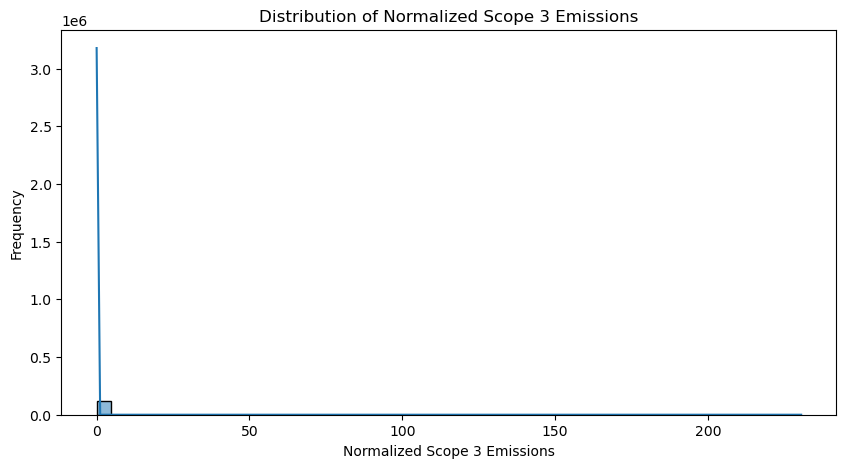

In [2]:
import numpy as np

# 1. Check if any Normalized_Emissions values are NaN
nan_count = df["Normalized_Emissions"].isna().sum()
print(f"🔍 Missing Normalized Emissions values: {nan_count}")

# 2. Check for infinite values
infinite_count = np.isinf(df["Normalized_Emissions"]).sum()
print(f"⚠️ Infinite Normalized Emissions values: {infinite_count}")

# 3. Check for zero or negative values (shouldn't exist after filtering)
negative_count = (df["Normalized_Emissions"] <= 0).sum()
print(f"⚠️ Negative or Zero Normalized Emissions values: {negative_count}")

# 4. Check basic statistics
print("\n📊 Normalized Emissions Summary Stats:")
print(df["Normalized_Emissions"].describe())

# 5. Sample a few records to manually verify calculation
sample_df = df.sample(5)[["account_id", "Scope_3_emissions_amount", "Revenue_USD", "Normalized_Emissions"]]
print("\n🔎 Sample of Normalized Emissions for verification:")
print(sample_df)

# 6. Histogram plot to visualize the distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Normalized_Emissions"], bins=50, kde=True)
plt.xlabel("Normalized Scope 3 Emissions")
plt.ylabel("Frequency")
plt.title("Distribution of Normalized Scope 3 Emissions")
plt.show()

In [5]:
# Remove rows where Normalized Emissions is exactly 0
df_filtered = df[df["Normalized_Emissions"] > 0]

print(f"✅ Removed {len(df) - len(df_filtered)} rows with zero Normalized Emissions.")
print(f"🔹 Remaining rows: {len(df_filtered)}")

# Re-run summary stats to confirm fix
print("\n📊 Updated Normalized Emissions Summary Stats:")
print(df_filtered["Normalized_Emissions"].describe())

# Save the filtered dataset
df_filtered.to_csv("Mega_merged_all_real_values_normalized.csv", index=False)
print("✅ Filtered dataset saved as `Mega_merged_all_real_values_normalized.csv`")

✅ Removed 14953 rows with zero Normalized Emissions.
🔹 Remaining rows: 101559

📊 Updated Normalized Emissions Summary Stats:
count    1.015590e+05
mean     4.445528e-03
std      7.434307e-01
min      1.974097e-13
25%      4.981660e-07
50%      2.895170e-06
75%      2.162575e-05
max      2.304778e+02
Name: Normalized_Emissions, dtype: float64
✅ Filtered dataset saved as `Mega_merged_all_real_values_normalized.csv`


In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import zscore

# Load the cleaned dataset
df = pd.read_csv("Mega_merged_all_real_values_normalized.csv")

# Get unique years from 2013 onwards
years = sorted(df[df["Year"] >= 2013]["Year"].unique())

# Create a base directory for storing results
base_output_dir = "scope3_emissions_normalized"
os.makedirs(base_output_dir, exist_ok=True)

# Iterate through each year
for year in years:
    print(f"Processing year: {year}")

    # Filter dataset for the given year
    yearly_df = df[df["Year"] == year]

    # Get unique primary activities for the year
    primary_activities_for_year = yearly_df["Primary activity"].dropna().unique()

    # Process in batches of 10
    batch_size = 10
    for i in range(0, len(primary_activities_for_year), batch_size):
        batch_activities = primary_activities_for_year[i:i + batch_size]

        # Create directory for this year
        year_output_dir = os.path.join(base_output_dir, f"{year}")
        os.makedirs(year_output_dir, exist_ok=True)

        # Filter data for selected activities
        filtered_df = yearly_df[yearly_df["Primary activity"].isin(batch_activities)]

        # Initialize list for detected outliers
        outliers_list = []

        # Process each activity in the batch
        for primary_activity in batch_activities:
            activity_df = filtered_df[filtered_df["Primary activity"] == primary_activity]

            if activity_df.empty:
                continue

            # Aggregate emissions by account_id (sum of normalized Scope 3 emission)
            aggregated_df = (
                activity_df.groupby("account_id")
                .agg({
                    "Normalized_Emissions": "sum",
                    "account_name": "first",  # Take first available company name
                    "Revenue_USD": "sum"  # Ensure valid revenue aggregation
                })
                .reset_index()
            )

            # Calculate Z-scores for normalized emissions
            aggregated_df["z_score"] = zscore(aggregated_df["Normalized_Emissions"], nan_policy='omit')

            # Identify outliers (Z-score > 2.0)
            aggregated_df["outlier"] = aggregated_df["z_score"].abs() > 2.0

            # Extract outliers
            outliers = aggregated_df[aggregated_df["outlier"]][["account_id", "account_name", "Normalized_Emissions", "z_score"]]
            outliers["Primary activity"] = primary_activity
            outliers["Year"] = year
            outliers_list.append(outliers)

            # Convert outlier column to string for visualization
            aggregated_df["outlier"] = aggregated_df["outlier"].astype(str)

            # Create scatter plot
            plt.figure(figsize=(15, 6))
            ax = sns.stripplot(
                x="account_name", 
                y="Normalized_Emissions", 
                data=aggregated_df, 
                jitter=True, 
                size=6, 
                hue="outlier", 
                palette={"True": "red", "False": "blue"} 
            )

            plt.xticks(rotation=90)
            plt.xlabel("Company Name")
            plt.ylabel("Normalized Scope 3 Emissions")
            plt.title(f"Normalized Scope 3 Emissions for {primary_activity} in {year}")

            # Format y-axis
            def human_format(num, pos):
                if num >= 1_000_000_000:
                    return f'{num / 1_000_000_000:.1f}B'
                elif num >= 1_000_000:
                    return f'{num / 1_000_000:.1f}M'
                else:
                    return f'{num:.4f}'  # More precision since values are smaller

            ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

            # Adjust legend
            handles, labels = ax.get_legend_handles_labels()
            legend_labels = {"False": "Normal", "True": "Outlier"}
            plt.legend(handles, [legend_labels[label] for label in labels], title="Outlier", loc="upper right")

            # Save plot
            filename = f"{primary_activity.replace(',', '').replace(' ', '_')}_{year}.png"
            file_path = os.path.join(year_output_dir, filename)
            plt.savefig(file_path, bbox_inches='tight')
            plt.close()

        # Merge all outliers
        if outliers_list:
            outliers_df = pd.concat(outliers_list, ignore_index=True)

            # Save outliers to a CSV file
            outliers_csv_path = os.path.join(year_output_dir, f"outliers_batch_{i // batch_size + 1}.csv")
            outliers_df.to_csv(outliers_csv_path, index=False)

            print(f"Saved outliers for batch {i // batch_size + 1} in year {year} to {outliers_csv_path}")

print("Processing complete. All normalized plots and outliers have been saved.")

/var/folders/h7/9xqmfqgd45b8j4np0nndf6gw0000gn/T/ipykernel_60073/362962985.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Mega_merged_all_real_values_normalized.csv")


Processing year: 2013
Saved outliers for batch 1 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_1.csv
Saved outliers for batch 2 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_2.csv
Saved outliers for batch 3 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_3.csv
Saved outliers for batch 4 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_4.csv
Saved outliers for batch 5 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_5.csv
Saved outliers for batch 6 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_6.csv
Saved outliers for batch 7 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_7.csv
Saved outliers for batch 8 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_8.csv
Saved outliers for batch 9 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_9.csv
Saved outliers for batch 10 in year 2013 to scope3_emissions_normalized/2013/outliers_batch_10.csv
Saved 

In [7]:
import pandas as pd
import os

# Define the base directory where all yearly data is stored
base_output_dir = "scope3_emissions_normalized"  # Ensure this matches the folder where outliers are saved

# Create an empty list to collect all outlier data
all_outliers = []

# Iterate through each year's folder
for year in sorted(os.listdir(base_output_dir)):
    year_path = os.path.join(base_output_dir, year)
    
    if os.path.isdir(year_path):  # Ensure it's a directory
        # Find all outlier CSV files in this year's folder
        for file in os.listdir(year_path):
            if file.startswith("outliers_batch") and file.endswith(".csv"):
                file_path = os.path.join(year_path, file)
                
                # Read and append the outlier data
                df_outliers = pd.read_csv(file_path)
                all_outliers.append(df_outliers)

# Combine all outlier data into one final DataFrame
if all_outliers:
    final_outliers_df = pd.concat(all_outliers, ignore_index=True)

    # Save the final combined outlier dataset
    final_outliers_path = os.path.join(base_output_dir, "all_outliers_combined_normalized.csv")
    final_outliers_df.to_csv(final_outliers_path, index=False)

    print(f"✅ All outliers merged and saved to: {final_outliers_path}")
    print(f"🔹 Total outliers in combined file: {len(final_outliers_df)}")
else:
    print("⚠️ No outlier files found to merge.")

✅ All outliers merged and saved to: scope3_emissions_normalized/all_outliers_combined_normalized.csv
🔹 Total outliers in combined file: 800


/var/folders/h7/9xqmfqgd45b8j4np0nndf6gw0000gn/T/ipykernel_60073/1622729260.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_outliers_df = pd.concat(all_outliers, ignore_index=True)


In [8]:
import pandas as pd

# Load the original dataset
original_file_path = "Mega_merged_all_real_values.csv"  # Update with the correct path
df_original = pd.read_csv(original_file_path)

# Load the outlier dataset (companies identified as outliers)
outliers_file_path = "scope3_emissions_normalized/all_outliers_combined_normalized.csv"
df_outliers = pd.read_csv(outliers_file_path)

# Remove all outlier companies from the original dataset
outlier_companies = df_outliers['account_id'].unique()
df_cleaned = df_original[~df_original['account_id'].isin(outlier_companies)]

# Compare total rows
original_rows = len(df_original)
cleaned_rows = len(df_cleaned)

# Compare unique companies
original_companies = df_original['account_id'].nunique()
cleaned_companies = df_cleaned['account_id'].nunique()

# Compare total and average Scope 3 emissions
original_total_emissions = df_original['Scope_3_emissions_amount'].sum()
cleaned_total_emissions = df_cleaned['Scope_3_emissions_amount'].sum()

original_avg_emissions = df_original['Scope_3_emissions_amount'].mean()
cleaned_avg_emissions = df_cleaned['Scope_3_emissions_amount'].mean()

# Compare primary activity distributions
original_activity_counts = df_original['Primary activity'].value_counts().head(10)
cleaned_activity_counts = df_cleaned['Primary activity'].value_counts().head(10)

# Display the comparison results
comparison_results = pd.DataFrame({
    "Metric": [
        "Total Rows",
        "Unique Companies",
        "Total Scope 3 Emissions",
        "Average Scope 3 Emissions per Record"
    ],
    "Original Dataset": [
        original_rows,
        original_companies,
        f"{original_total_emissions:,.0f}",
        f"{original_avg_emissions:,.0f}"
    ],
    "Cleaned Dataset": [
        cleaned_rows,
        cleaned_companies,
        f"{cleaned_total_emissions:,.0f}",
        f"{cleaned_avg_emissions:,.0f}"
    ]
})

# Display top primary activities in both datasets
activity_comparison = pd.DataFrame({
    "Primary Activity (Top 10 in Original)": original_activity_counts.index,
    "Original Count": original_activity_counts.values,
    "Primary Activity (Top 10 in Cleaned)": cleaned_activity_counts.index,
    "Cleaned Count": cleaned_activity_counts.values
})

# Display comparison results
print("🔍 Dataset Comparison Summary:")
print(comparison_results)

print("\n📊 Top 10 Primary Activities in Each Dataset:")
print(activity_comparison)

/var/folders/h7/9xqmfqgd45b8j4np0nndf6gw0000gn/T/ipykernel_60073/3427514230.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(original_file_path)


🔍 Dataset Comparison Summary:
                                 Metric Original Dataset  Cleaned Dataset
0                            Total Rows           181156           156870
1                      Unique Companies             8795             8361
2               Total Scope 3 Emissions  621,983,206,827  272,825,539,955
3  Average Scope 3 Emissions per Record        3,433,412        1,739,182

📊 Top 10 Primary Activities in Each Dataset:
  Primary Activity (Top 10 in Original)  Original Count  \
0                                 Banks            8605   
1                 Electronic components            5651   
2           Fabricated metal components            5577   
3           Telecommunications services            5187   
4                  Electrical equipment            4828   
5                   Specialty chemicals            4231   
6           Other professional services            4203   
7                             Insurance            3781   
8                  Elec

# Woohoo!! We have successfully removed outliers from our data and reduced the dataset!